<a href="https://colab.research.google.com/github/aarushkachhawa/Deep-Fake-Detection/blob/main/DeepFakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/DeepFakeDetection/Deep-Fake-Detection
! git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DeepFakeDetection/Deep-Fake-Detection
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/aarushkachhawa/Deep-Fake-Detection
   d3fa1d5..90ca0e4  main       -> origin/main
Updating d3fa1d5..90ca0e4
Fast-forward
 real_sample/.DS_Store | Bin 6148 -> 0 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 real_sample/.DS_Store


In [ ]:
from skimage.io import imread
from skimage.color import convert_colorspace
from skimage import exposure
from skimage import feature
from skimage.color import rgb2gray
from skimage.transform import resize
import pandas as pd
import tensorflow as tf
import torch
from numba import cuda 
import time

from tensorflow import keras

device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
import os
import tqdm

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from keras import callbacks
import keras
from keras import losses
import gc

In [ ]:
def preProcess(image):
    imgNewSpace = convert_colorspace(image, 'RGB', 'YCbCr')
    gammaEnhanced = exposure.adjust_gamma(imgNewSpace, 2)
    enhanced = convert_colorspace(gammaEnhanced, 'YCbCr','RGB')
    grayimg = rgb2gray(enhanced)
    edges = feature.canny(grayimg, sigma=3)
    return grayimg 


In [ ]:
from PIL import Image
image = Image.open('real_sample/00005.jpg')
image.size


(256, 256)

DeepFakeDetection.ipynb  fake_sample  README.md  real_sample


In [ ]:
os.listdir('real_sample/')

['00005.jpg',
 '00008.jpg',
 '00020.jpg',
 '00024.jpg',
 '00026.jpg',
 '00034.jpg',
 '00037.jpg',
 '00039.jpg',
 '00041.jpg',
 '00047.jpg',
 '00062.jpg',
 '00064.jpg',
 '00071.jpg',
 '00085.jpg',
 '00095.jpg',
 '00097.jpg',
 '00101.jpg',
 '00103.jpg',
 '00105.jpg',
 '00111.jpg',
 '00112.jpg',
 '00117.jpg',
 '00118.jpg',
 '00125.jpg',
 '00128.jpg',
 '00138.jpg',
 '00148.jpg',
 '00149.jpg',
 '00153.jpg',
 '00154.jpg',
 '00183.jpg',
 '00186.jpg',
 '00187.jpg',
 '00207.jpg',
 '00224.jpg',
 '00231.jpg',
 '00248.jpg',
 '00250.jpg',
 '00253.jpg',
 '00254.jpg',
 '00266.jpg',
 '00267.jpg',
 '00283.jpg',
 '00295.jpg',
 '00312.jpg',
 '00314.jpg',
 '00316.jpg',
 '00322.jpg',
 '00347.jpg',
 '00348.jpg',
 '00358.jpg',
 '00369.jpg',
 '00379.jpg',
 '00380.jpg',
 '00383.jpg',
 '00388.jpg',
 '00409.jpg',
 '00431.jpg',
 '00432.jpg',
 '00436.jpg',
 '00439.jpg',
 '00452.jpg',
 '00453.jpg',
 '00462.jpg']

In [ ]:
def loadImages(dataPath, category):
  flat_data_arr=[] #input array
  target_arr=[] #output array
  for i in range(len(dataPath)):
    for image in os.listdir(dataPath[i]):
      if (not image.endswith('.jpg')):
        continue
      image_array = cv2.imread(os.path.join(dataPath[i], image))
      if image_array is None:
        print(image)
      #print(image_array.shape)
      image_resized = resize(image_array, (150,150,3))
      #image_preprocess = preProcess(image_resized)
      flat_data_arr.append(image_resized)
      target_arr.append(category[i])
  x = np.array(flat_data_arr)
  y = np.array(target_arr)
    #print(x)
  return x, y


In [ ]:
categories=[1,0]

#path which contains all the categories of images
datadir='real_sample/'
datadirs = ['real_sample/', 'fake_sample/'] 

x,y = loadImages(datadirs, categories)

In [ ]:
x.shape

(128, 150, 150, 3)

In [ ]:
x = np.resize(x, (x.shape[0], 150,150,1))
x

array([[[[0.04104575],
         [0.04937847],
         [0.04937847],
         ...,
         [0.10849359],
         [0.11882196],
         [0.13435137]],

        [[0.09845194],
         [0.11021664],
         [0.12728854],
         ...,
         [0.12585063],
         [0.14066388],
         [0.14379085]],

        [[0.14373542],
         [0.14885804],
         [0.15285804],
         ...,
         [0.70462013],
         [0.7712868 ],
         [0.80658092]],

        ...,

        [[0.12172549],
         [0.13341176],
         [0.13341176],
         ...,
         [0.41191843],
         [0.49403765],
         [0.69795765]],

        [[0.43429595],
         [0.51395608],
         [0.72452131],
         ...,
         [0.41756706],
         [0.49714876],
         [0.71552784]],

        [[0.38407529],
         [0.47027137],
         [0.67803608],
         ...,
         [0.71074667],
         [0.76172706],
         [0.7930719 ]]],


       [[[0.12818301],
         [0.13602614],
         [0.13

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
#x_train

Splitted Successfully


In [ ]:
x_train

array([[[[0.64792715],
         [0.68714283],
         [0.68714283],
         ...,
         [0.60010301],
         [0.6105851 ],
         [0.68896732]],

        [[0.60784314],
         [0.61799407],
         [0.70034702],
         ...,
         [0.69960296],
         [0.75596898],
         [0.85715974]],

        [[0.69519425],
         [0.74889203],
         [0.8455702 ],
         ...,
         [0.36883102],
         [0.21466109],
         [0.54525961]],

        ...,

        [[0.60767041],
         [0.63191599],
         [0.66468444],
         ...,
         [0.36240523],
         [0.40530719],
         [0.60680052]],

        [[0.33987399],
         [0.38301124],
         [0.57870466],
         ...,
         [0.30711111],
         [0.36162806],
         [0.52633394]],

        [[0.48145098],
         [0.53478588],
         [0.69303425],
         ...,
         [0.11517107],
         [0.09876863],
         [0.20893298]]],


       [[[0.57691346],
         [0.60302954],
         [0.65

In [ ]:
# device = cuda.get_current_device()
# device
torch.cuda.empty_cache()
gc.collect()

3443

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K


# Pamameters Initialization
inputShape = (x_train.shape[1], x_train.shape[2],1)
activation = 'sigmoid' # change to relu
padding = 'same'
droprate = 0.1
epsilon=0.001
model = Sequential()
model.add(keras.Input(shape=inputShape))
model.add(BatchNormalization(input_shape=inputShape))
model.add(Conv2D(filters=6, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
          
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 150, 150, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 6)       60        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 6)        0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 6)        24        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        1760      
                                                      

In [ ]:
#from tensorflow.keras.optimizers import RMSprop
#opt = rmsprop(lr=0.0001, decay=1e-6)
#opt = Adam(lr=0.001, decay=1e-6)
#model.compile(loss='Loss',optimizer=keras.optimizers.SGD(0.001), metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-6)
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 16, 
                    epochs = 10, 
                    verbose = 1, 
                    validation_split = 0.2, 
                    shuffle = True)

Epoch 1/10
6/6 [==============================] - 3s 339ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 2/10
6/6 [==============================] - 2s 293ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 3/10
6/6 [==============================] - 2s 288ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 4/10
6/6 [==============================] - 2s 292ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 5/10
6/6 [==============================] - 2s 293ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 6/10
6/6 [==============================] - 2s 291ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 7/10
6/6 [==============================] - 2s 292ms/step - loss: nan - accuracy: 0.5309 - val_loss: nan - val_accuracy: 0.3810
Epoch 8/10
6/6 [==============================] - 2s 293ms/ste

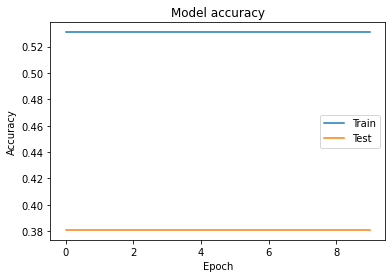

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()